In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
%cd /content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos

/content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import glob as glb

# Abriendo los archivos

In [ ]:
files_df = sorted(glb.glob("Scikit_regresion_multivariada/*csv"))
files_df

['Scikit_regresion_multivariada/Cape.csv',
 'Scikit_regresion_multivariada/Cloud_base_height.csv',
 'Scikit_regresion_multivariada/Convective_inhibition.csv',
 'Scikit_regresion_multivariada/Convective_pp.csv',
 'Scikit_regresion_multivariada/Convective_rain_rate.csv',
 'Scikit_regresion_multivariada/IndiceK.csv',
 'Scikit_regresion_multivariada/Total_pp.csv',
 'Scikit_regresion_multivariada/Ttalcloud_cover.csv']

In [ ]:
archivos_df=[]
for i in files_df:
  df = pd.read_csv(i)
  df.drop('Unnamed: 0',axis="columns",inplace=True)
  df= df[df["light"]>0]
  archivos_df.append(df)

In [ ]:
df_cape,df_cbh,df_cin,df_cpp,df_crr,df_k,df_pp,df_cloud = archivos_df[0],archivos_df[1],archivos_df[2],archivos_df[3],archivos_df[4],archivos_df[5],archivos_df[6],archivos_df[7]

In [ ]:
combinacion1=pd.merge(df_cape,df_cbh,how="outer")
combinacion2=pd.merge(df_cin,df_cpp,how="outer")
combinacion3=pd.merge(df_crr,df_k,how="outer")
combinacion4=pd.merge(df_pp,df_cloud,how="outer")
#combinaciones
comb1_2= pd.merge(combinacion1,combinacion2,how="outer")
comb_3_4 = pd.merge(combinacion3,combinacion4,how="outer")

In [ ]:
df_regresion = pd.merge(comb1_2,comb_3_4,how="outer")
df_regresion=df_regresion.dropna()
df_regresion.head()

,time,longitude,latitude,light,cape,cbh,cin,cp,crr,kx,tp,tcc
0,2015-01-01 21:00:00,-76.00,-11.75,1.0,903.57200,68.567870,1.706421,0.000747,0.000240,14.831703,0.001293,1.000000
1,2015-01-02 19:00:00,-76.00,-12.00,1.0,901.73145,291.360350,0.030457,0.000439,0.000074,10.315121,0.000523,0.936429
2,2015-01-06 18:00:00,-76.00,-11.75,1.0,1239.68630,29.947266,6.673401,0.001344,0.000040,4.744370,0.001372,0.911251
5,2015-01-26 17:00:00,-75.75,-11.75,1.0,503.46338,653.668950,58.796173,0.000074,0.000040,10.619560,0.000082,0.950712
6,2015-01-31 19:00:00,-76.00,-11.75,1.0,422.33690,40.326660,0.746552,0.000549,0.000096,10.958077,0.000796,1.000000


In [ ]:
df_regresion.describe()

,longitude,latitude,light,cape,cbh,cin,cp,crr,kx,tp,tcc
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,7.750000e+02,775.000000
mean,-75.886774,-11.841290,2.180645,725.619692,299.683186,19.766525,0.000766,0.000226,10.934152,9.390351e-04,0.933498
std,0.124525,0.120447,3.213487,598.712136,368.819157,35.561836,0.000574,0.000339,2.783770,7.468457e-04,0.108152
min,-76.000000,-12.000000,1.000000,0.424805,29.706055,0.015228,0.000000,0.000000,-1.376190,-1.862645e-09,0.260128
25%,-76.000000,-12.000000,1.000000,315.514160,54.809570,1.211258,0.000316,0.000025,9.284805,4.200870e-04,0.913235
50%,-76.000000,-11.750000,1.000000,591.102050,248.636230,6.109680,0.000657,0.000075,11.048954,7.976349e-04,0.983093
75%,-75.750000,-11.750000,2.000000,968.699460,425.083750,22.709427,0.001125,0.000235,12.733583,1.315075e-03,1.000000
max,-75.750000,-11.750000,47.000000,5092.539000,7529.088000,312.965200,0.003876,0.001891,19.923080,7.457689e-03,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


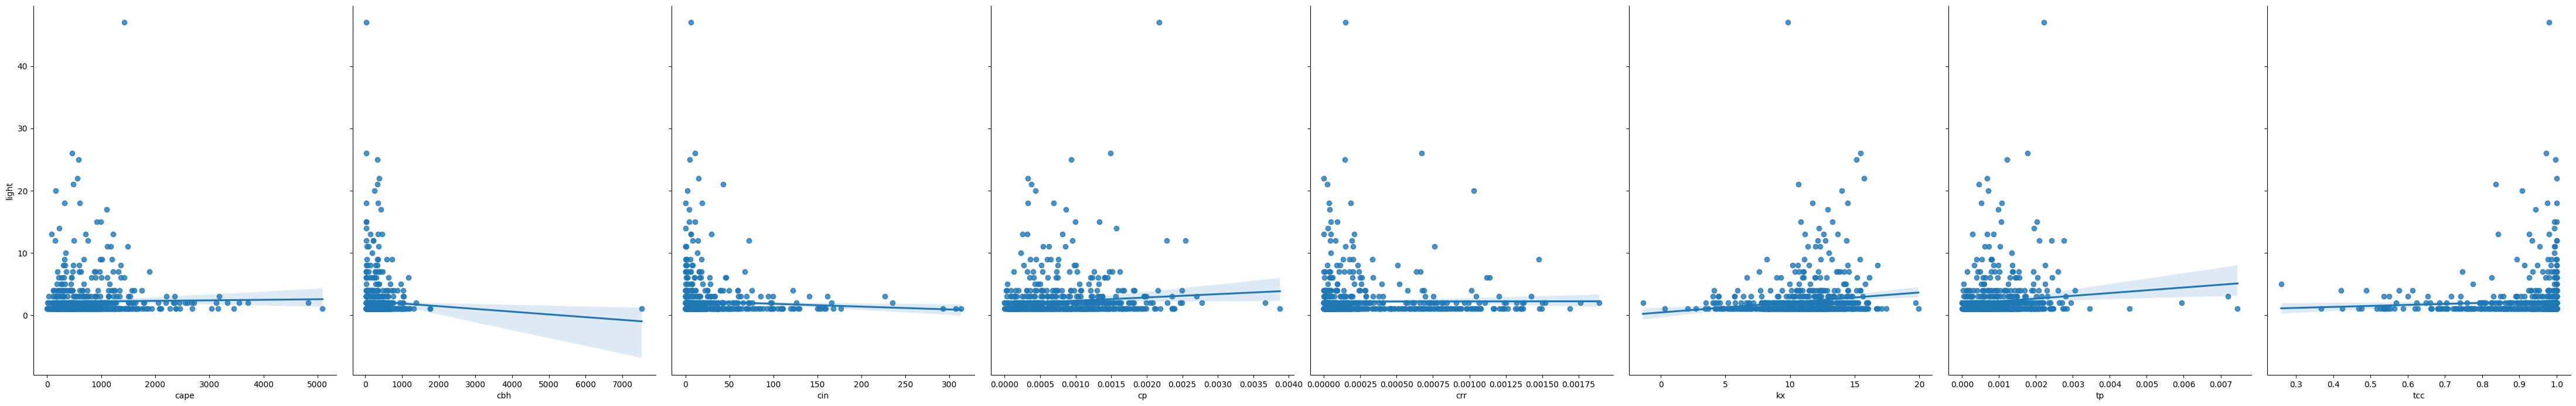

In [ ]:
sns.pairplot(df_regresion, x_vars=['cape',"cbh","cin",'cp','crr', "kx",'tp',"tcc"], y_vars='light',
             size=7, aspect=0.8,kind = 'reg')

# Scikit learn

In [ ]:
X_independientes = df_regresion.iloc[:,4:]
X_independientes

,cape,cbh,cin,cp,crr,kx,tp,tcc
0,903.572000,68.567870,1.706421,0.000747,0.000240,14.831703,0.001293,1.000000
1,901.731450,291.360350,0.030457,0.000439,0.000074,10.315121,0.000523,0.936429
2,1239.686300,29.947266,6.673401,0.001344,0.000040,4.744370,0.001372,0.911251
5,503.463380,653.668950,58.796173,0.000074,0.000040,10.619560,0.000082,0.950712
6,422.336900,40.326660,0.746552,0.000549,0.000096,10.958077,0.000796,1.000000
...,...,...,...,...,...,...,...,...
1233,126.715330,270.118650,23.676910,0.000939,0.000139,14.736282,0.001093,0.989318
1235,1497.789100,424.359380,18.070038,0.001991,0.000032,10.644550,0.002013,0.941800
1239,1497.505900,34.292480,35.545868,0.002365,0.000242,9.267765,0.002472,1.000000
1241,896.068360,367.152830,28.582947,0.000255,0.000006,12.877850,0.000483,1.000000


In [ ]:
Y_dependiente = df_regresion.iloc[:, 3:4]
Y_dependiente

,light
0,1.0
1,1.0
2,1.0
5,1.0
6,1.0
...,...
1233,1.0
1235,1.0
1239,1.0
1241,1.0


In [ ]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1280)

In [ ]:
print(X_entrena)

             cape         cbh        cin        cp       crr         kx  \
977    320.681640   37.430176  11.503265  0.000522  0.000007   6.802731   
942   1393.726800   30.430176   0.426605  0.001039  0.000259   9.597195   
1177   476.845700  397.566400   3.245270  0.000371  0.000036   9.006496   
386      8.353027  203.981450   0.045685  0.000138  0.000120  13.220913   
536   1337.802000   29.947266   0.350403  0.000954  0.000726  10.333298   
...           ...         ...        ...       ...       ...        ...   
1191   459.431640  660.668950  98.151090  0.000602  0.000004  10.233334   
1164   204.584960  660.186040  56.282227  0.000047  0.000033  10.115192   
242   1888.553500   30.430176   0.213287  0.001257  0.000241  12.194004   
417    977.477540   30.188965   0.106628  0.001113  0.000132  12.275791   
1235  1497.789100  424.359380  18.070038  0.001991  0.000032  10.644550   

            tp       tcc  
977   0.000744  0.965514  
942   0.001282  1.000000  
1177  0.000476  0.

In [ ]:
modelo_rm = LinearRegression()
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

In [ ]:
b0 = modelo_rm.intercept_
print (b0)

[1.08513973]


In [ ]:
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
b5 = modelo_rm.coef_[0, 4:5]
b6 = modelo_rm.coef_[0, 5:6]
b7 = modelo_rm.coef_[0, 6:7]
b8 = modelo_rm.coef_[0, 7:8]
print (b1, b2, b3, b4,b5,b6,b7,b8)

[0.00016854] [7.89299868e-06] [-0.00275177] [1114.47583761] [-583.38292705] [0.15591692] [-512.11492431] [-0.96547251]


In [ ]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.025400662540810637


In [ ]:
predicciones = modelo_rm.predict(X_valida)
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Rayos_Y = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
comparaciones

,cape,cbh,cin,cp,crr,kx,tp,tcc,Rayos_Y,Predicho
985,131.24610,94.154300,27.943024,0.000120,0.000020,8.302200,0.000266,0.946622,1.0,1.397878
629,1534.74170,30.188965,0.182831,0.000796,0.000289,12.255344,0.000911,0.993347,3.0,2.546850
1145,1003.95337,287.498050,18.679474,0.000983,0.000032,6.475574,0.001007,0.973326,1.0,1.836529
355,500.06543,62.291992,1.081757,0.000700,0.000405,9.215511,0.000826,1.000000,2.0,1.759199
1239,1497.50590,34.292480,35.545868,0.002365,0.000242,9.267765,0.002472,1.000000,1.0,2.948106
...,...,...,...,...,...,...,...,...,...,...
748,200.47900,485.187000,3.047211,0.000332,0.000091,10.728611,0.000376,0.891383,1.0,2.051624
80,1335.53690,32.120117,43.026794,0.000727,0.000686,12.680195,0.001023,1.000000,4.0,2.089851
332,854.72656,30.188965,2.148285,0.000538,0.000128,9.942528,0.000694,1.000000,2.0,1.978594
793,140.02393,469.014650,8.882660,0.000539,0.000007,12.580231,0.000585,0.844658,2.0,2.531566


In [ ]:
corr_spearman_modelo=comparaciones["Predicho"].corr(comparaciones["Rayos_Y"], method='spearman')
corr_spearman_modelo

0.13479061916195026

In [ ]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Root Mean Squared Error RMSE: 2.6100372351684835


# Usando la ecuacion

In [ ]:
ecuacion= b0[0]+b1[0]*df_regresion["cape"]+b2[0]*df_regresion["cbh"]+b3[0]*df_regresion["cin"]+b4[0]*df_regresion["cp"]+b5[0]*df_regresion["crr"]+b6[0]*df_regresion["kx"]+b7[0]*df_regresion["tp"]+b8[0]*df_regresion["tcc"]
df_regresion["predicción"]=ecuacion
df_regresion.head()

,time,longitude,latitude,light,cape,cbh,cin,cp,crr,kx,tp,tcc,predicción
0,2015-01-01 21:00:00,-76.00,-11.75,1.0,903.57200,68.567870,1.706421,0.000747,0.000240,14.831703,0.001293,1.000000,2.610482
1,2015-01-02 19:00:00,-76.00,-12.00,1.0,901.73145,291.360350,0.030457,0.000439,0.000074,10.315121,0.000523,0.936429,2.121301
2,2015-01-06 18:00:00,-76.00,-11.75,1.0,1239.68630,29.947266,6.673401,0.001344,0.000040,4.744370,0.001372,0.911251,1.908381
5,2015-01-26 17:00:00,-75.75,-11.75,1.0,503.46338,653.668950,58.796173,0.000074,0.000040,10.619560,0.000082,0.950712,1.768934
6,2015-01-31 19:00:00,-76.00,-11.75,1.0,422.33690,40.326660,0.746552,0.000549,0.000096,10.958077,0.000796,1.000000,2.045828


In [ ]:
corr_spearman_ecuacion=df_regresion['light'].corr(df_regresion['predicción'], method='spearman')
corr_spearman_ecuacion

0.15255107562536774

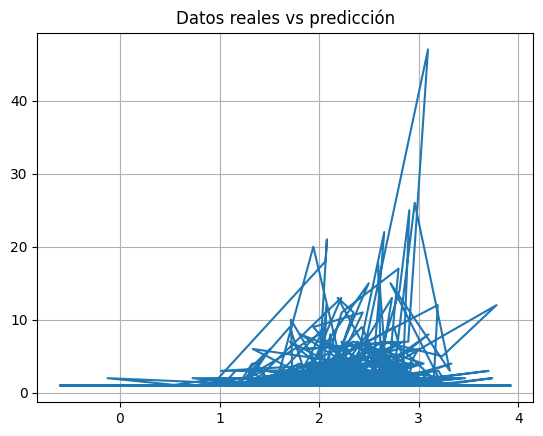

In [ ]:
plt.plot(df_regresion['predicción'],df_regresion['light'])
plt.title("Datos reales vs predicción")
plt.grid()
plt.show()